In [141]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [142]:
df = pd.read_csv('train.csv')
df.shape

(137, 43)

In [143]:
test_df = pd.read_csv('test.csv')
test_df.shape

(100000, 42)

Мало данных для обучения -- легко получить переобучение => избегать сложных моделей, использовать регуляризацию

In [144]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [145]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

Нет пропущенных значений, признаки P1-37 числовые

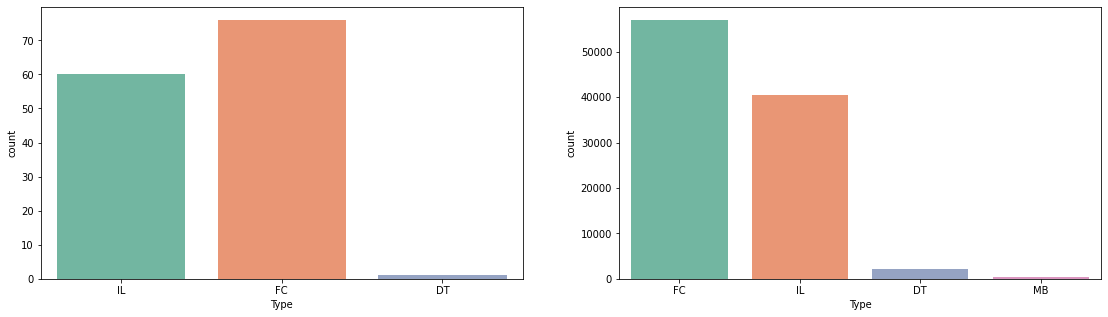

In [147]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
f1 = sns.countplot(df['Type'],palette="Set2", ax=ax[0]);
f2 = sns.countplot(test_df['Type'],palette="Set2", ax=ax[1]);
fig.show()

Нет Type == MB в train датасете, DT и МB мало (можно объединить)

In [148]:
test_df.loc[test_df.Type == 'MB', 'Type'] = 'DT'

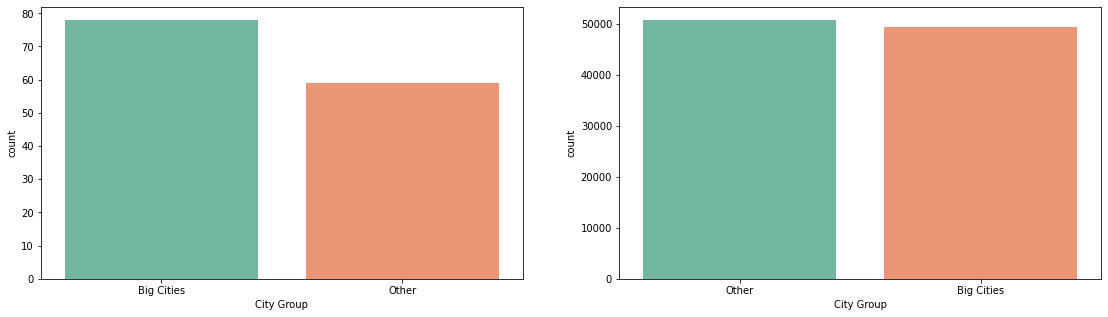

In [149]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
f1 = sns.countplot(df['City Group'],palette="Set2", ax=ax[0]);
f2 = sns.countplot(test_df['City Group'],palette="Set2", ax=ax[1]);
fig.show()

In [150]:
(df['City'].nunique(), test_df['City'].nunique())

(34, 57)

Различных городов больше в тестовом датасете, сложно использовать этот признак

In [151]:
df = df.drop('City', axis=1)
test_df = test_df.drop('City', axis=1)

In [152]:
df = df.drop('Id', axis=1)

In [153]:
df.head()

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Other,IL,2,4.0,2.0,5.0,2,3,5,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Other,IL,6,4.5,6.0,6.0,4,4,10,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [154]:
df['Open Date'] = pd.to_datetime(df['Open Date'])
test_df['Open Date'] = pd.to_datetime(test_df['Open Date'])

In [155]:
# введем признак количество дней с открытия (на момент открытия соревнования)
curr_date = datetime.datetime(2015, 3, 23)
df['Days'] = (curr_date - df['Open Date']).dt.days
test_df['Days'] = (curr_date - test_df['Open Date']).dt.days

In [156]:
test_df['Days'].describe()

count    100000.000000
mean       2366.842800
std        1749.439393
min         443.000000
25%        1083.000000
50%        1851.000000
75%        2928.000000
max        7259.000000
Name: Days, dtype: float64

Можно масштабировать делением на 1000

In [157]:
df['Days'] /= 1000
test_df['Days'] /= 1000
df = df.drop('Open Date', axis=1)
test_df = test_df.drop('Open Date', axis=1)

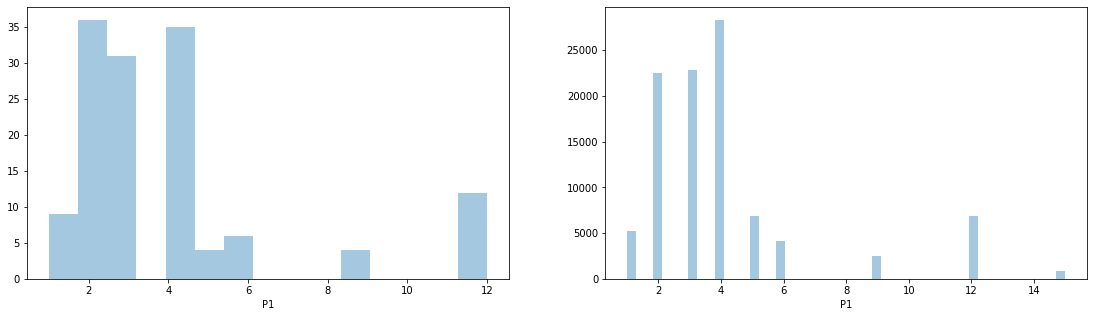

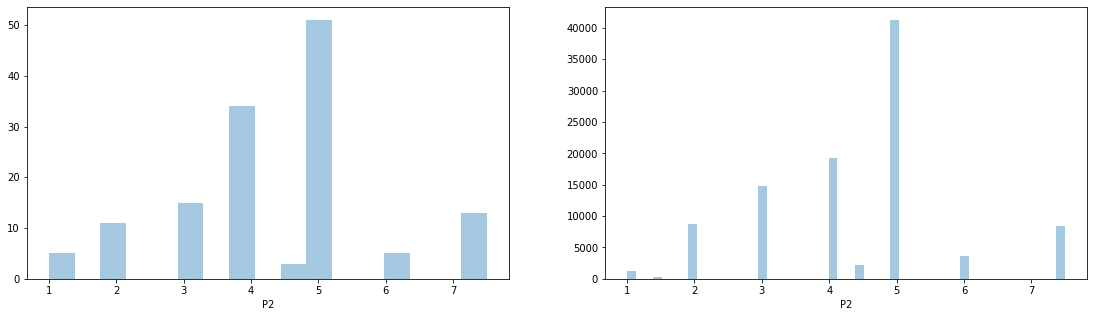

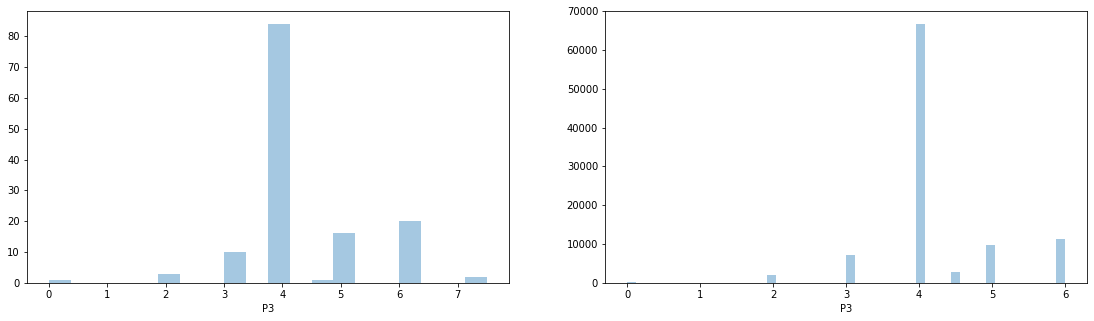

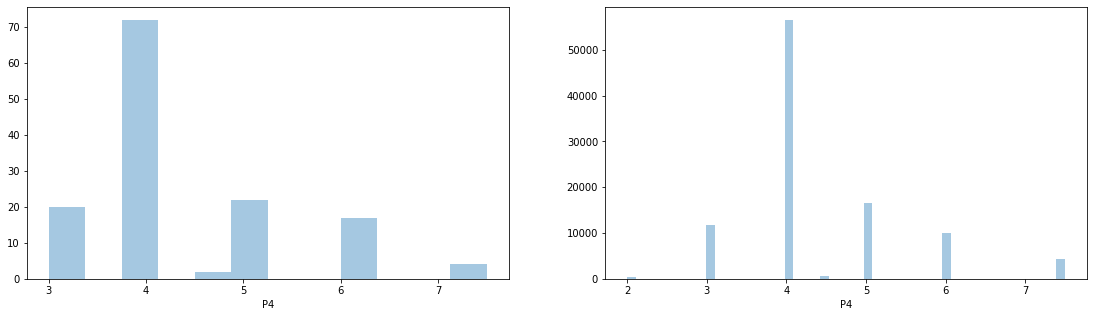

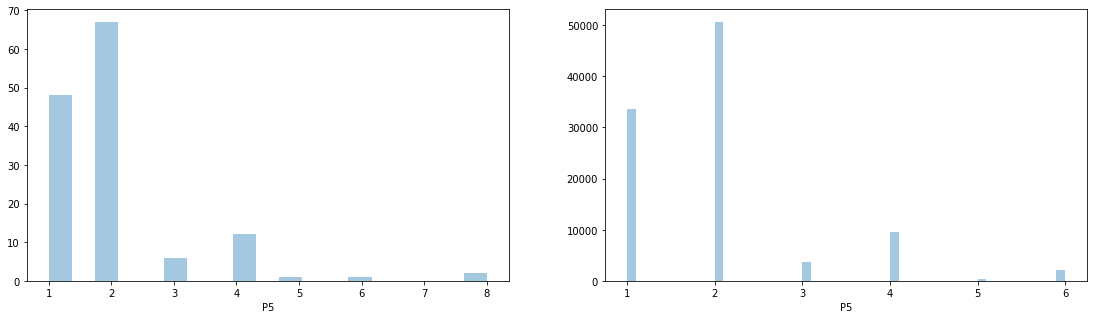

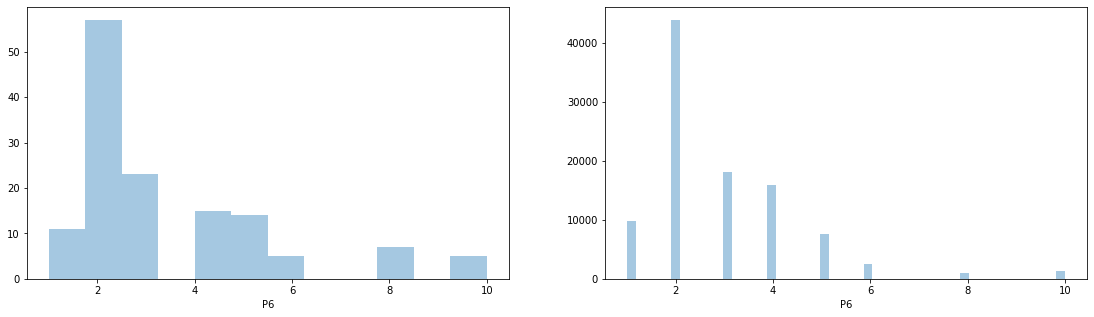

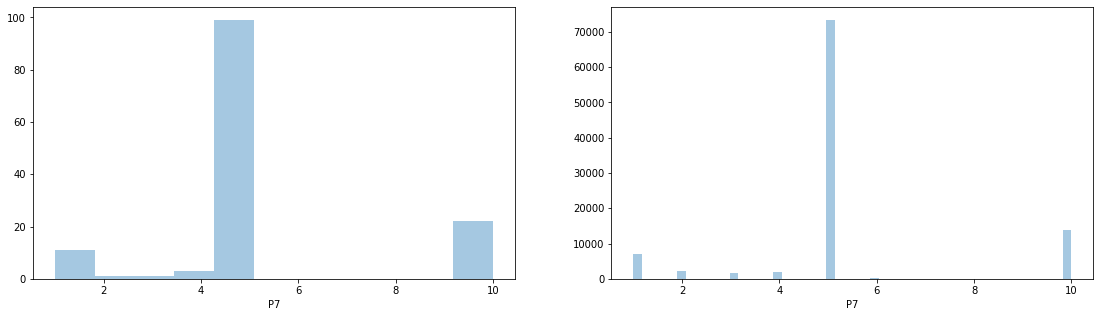

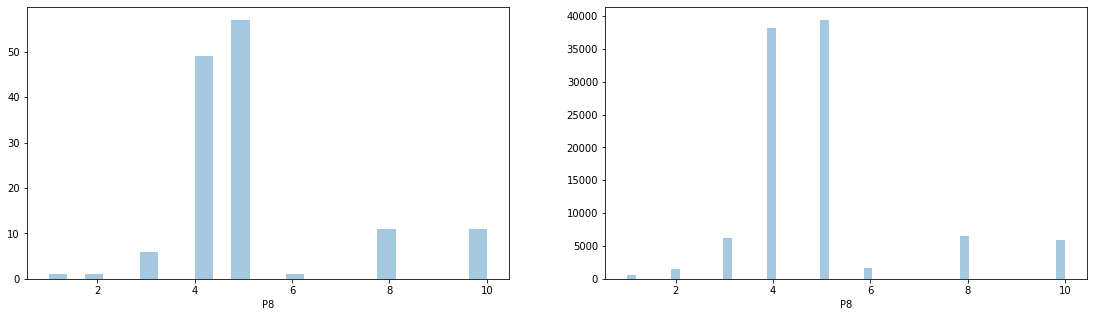

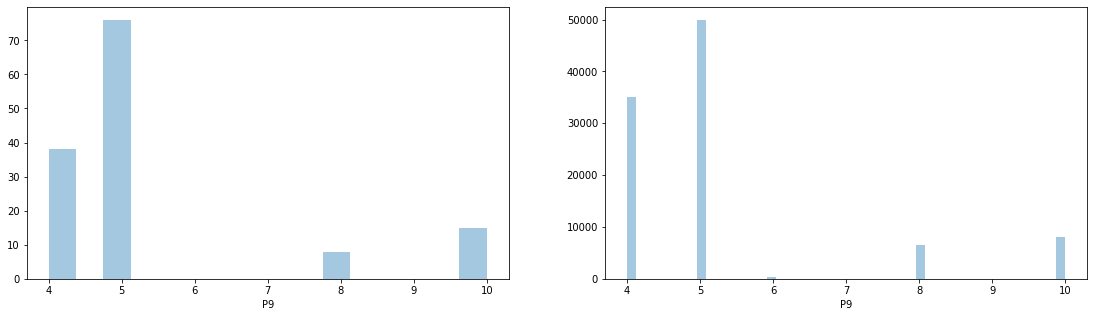

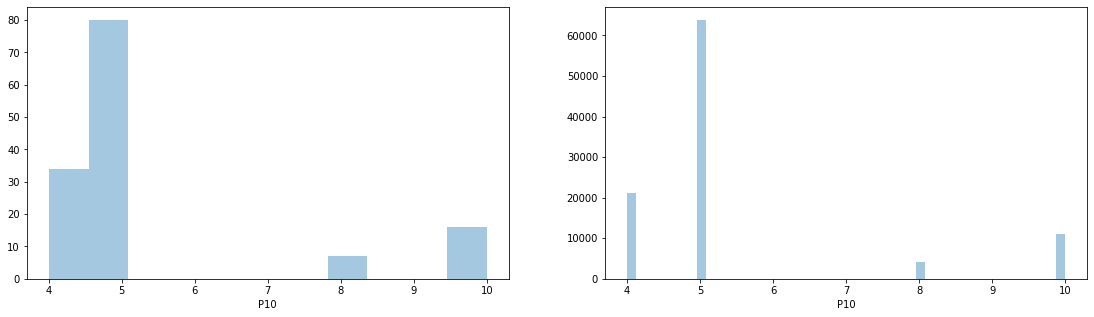

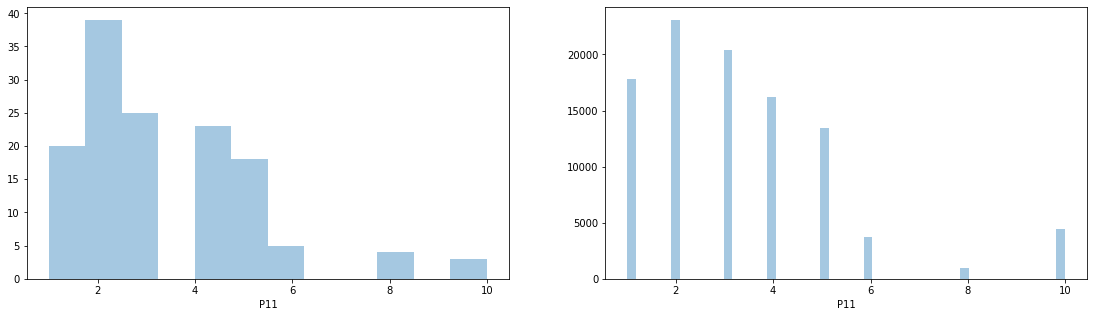

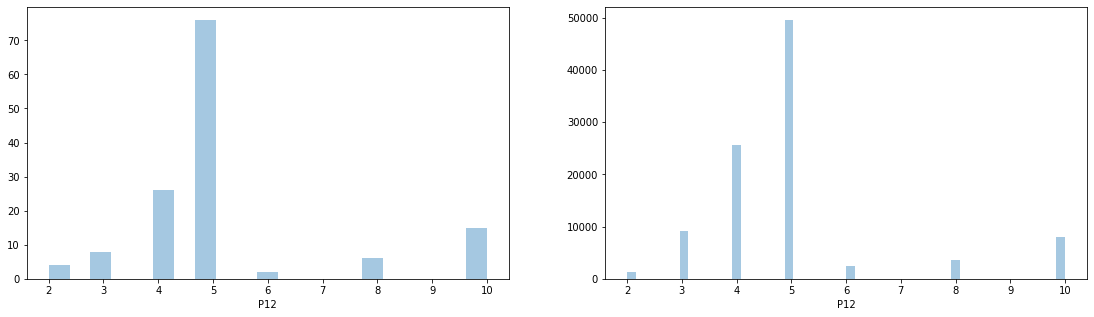

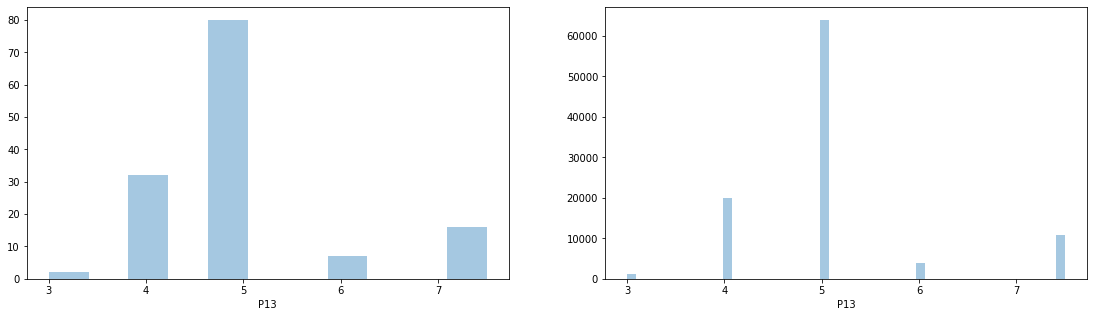

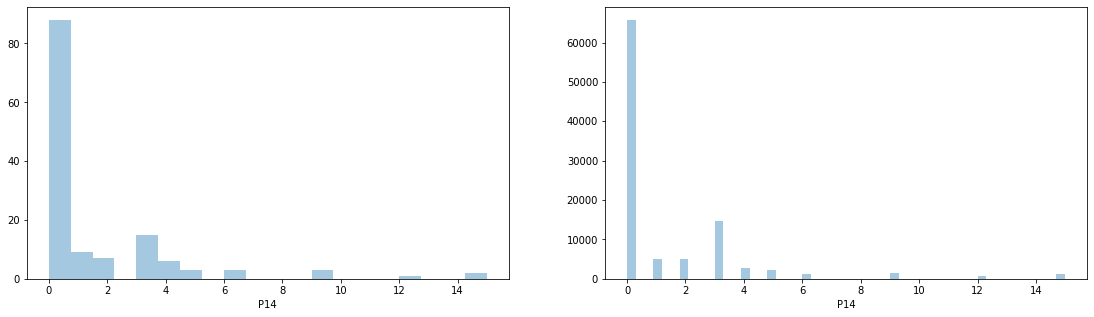

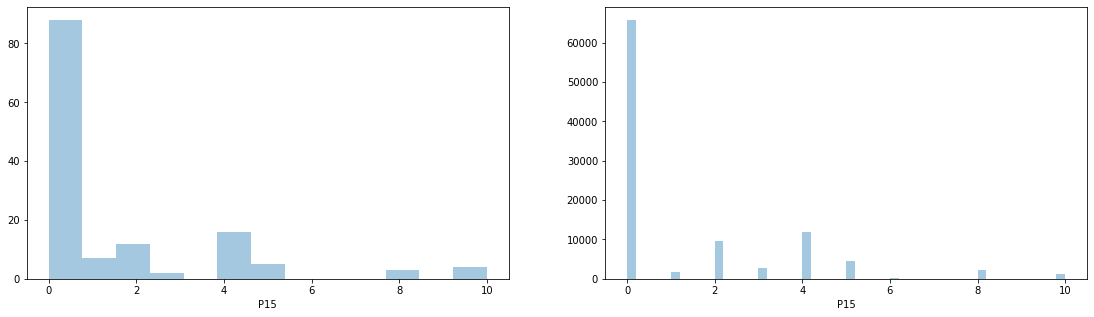

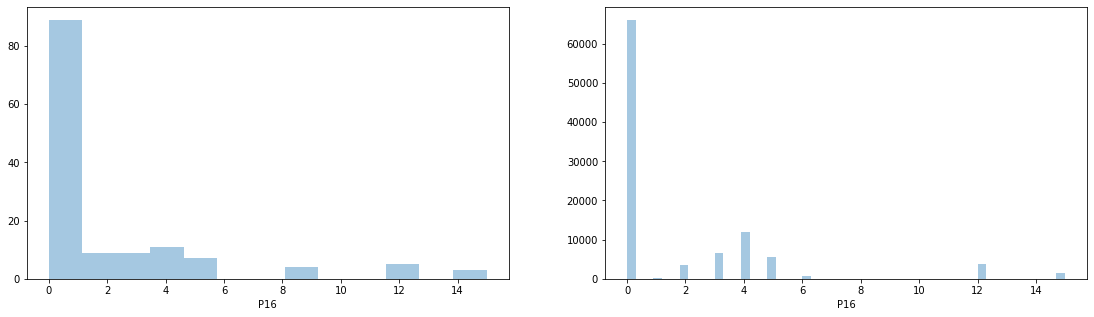

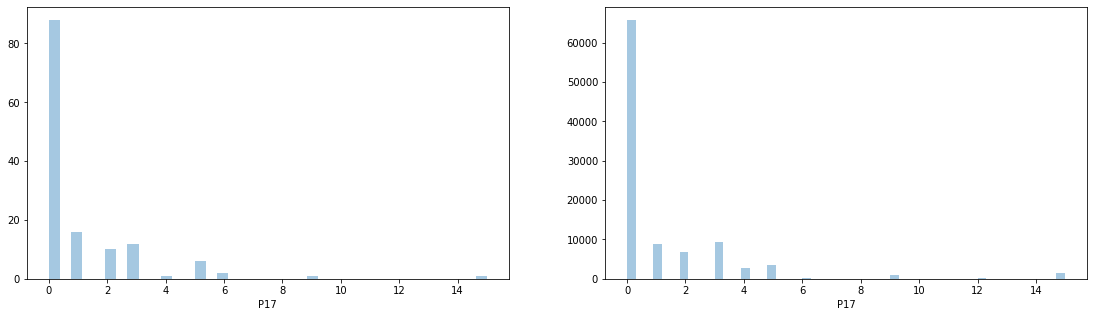

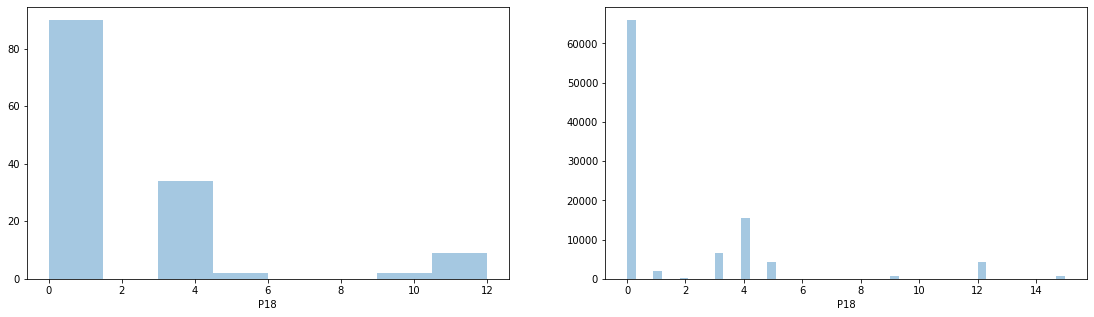

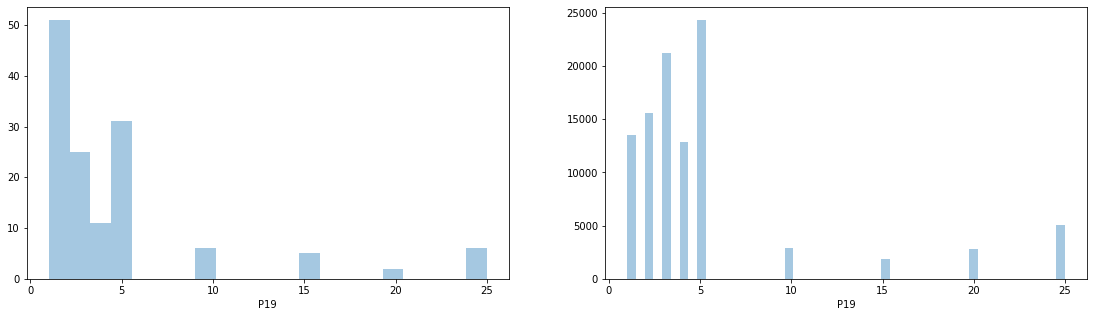

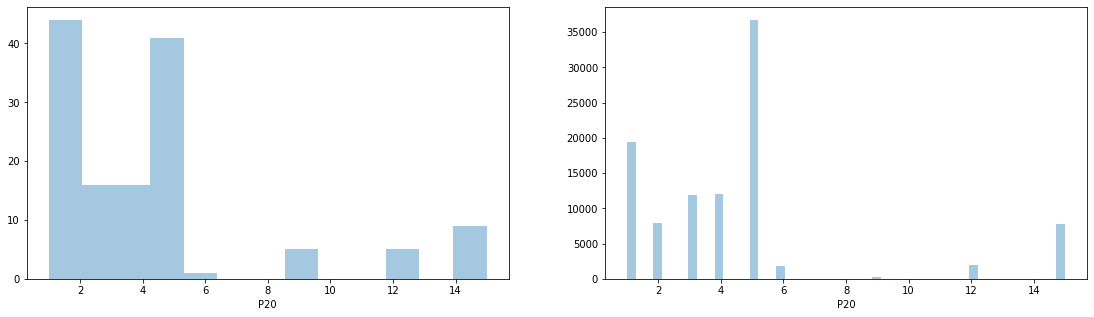

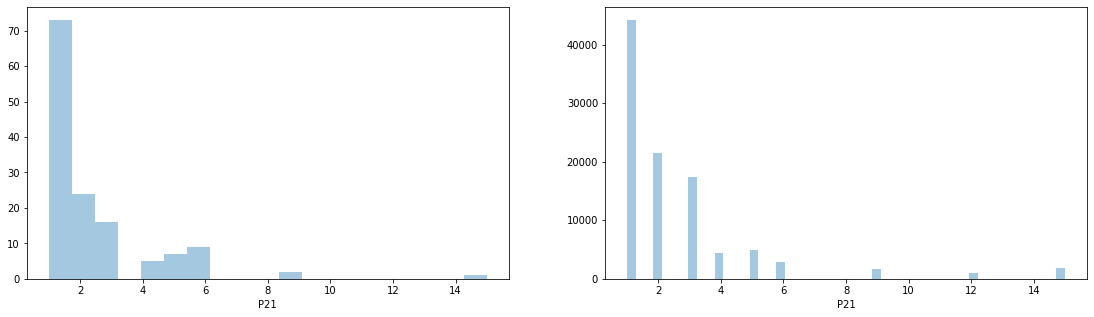

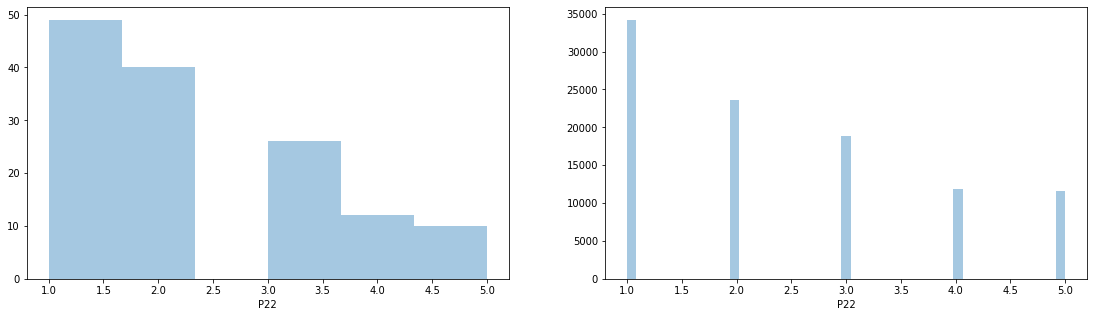

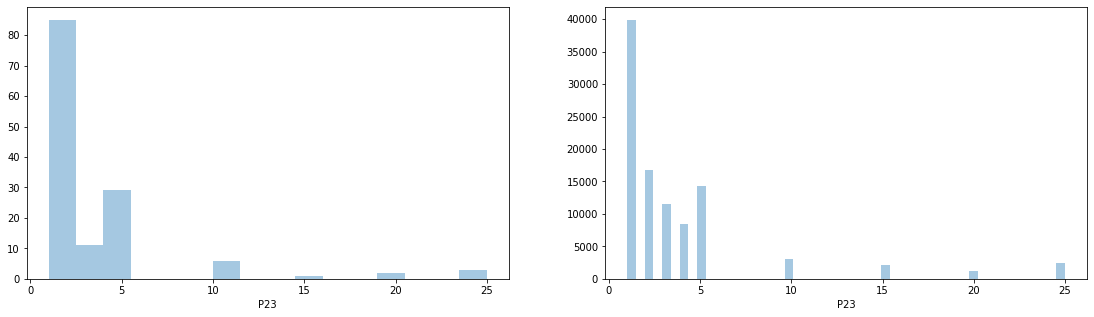

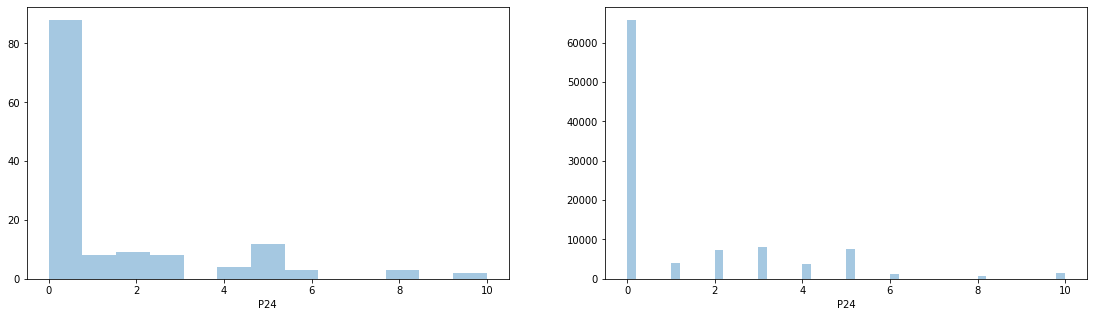

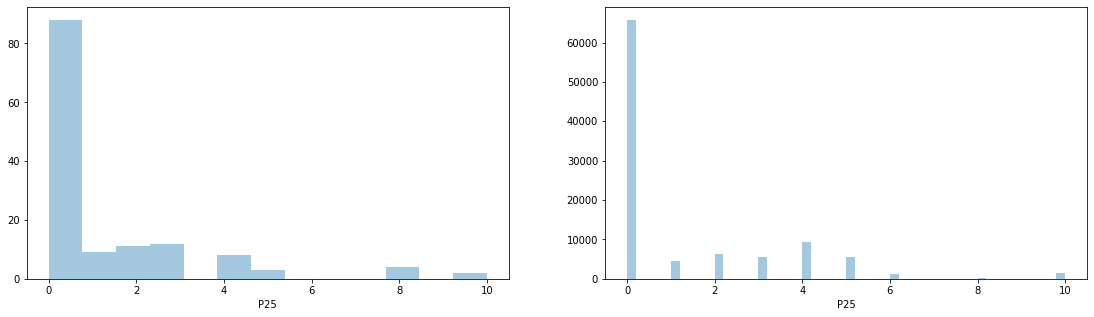

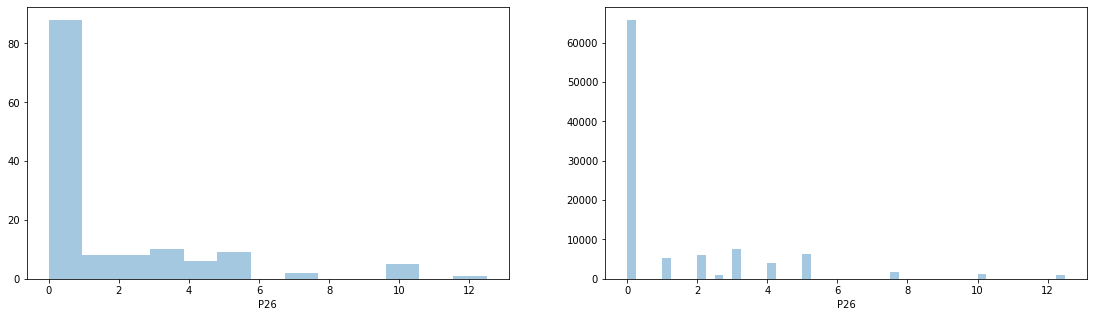

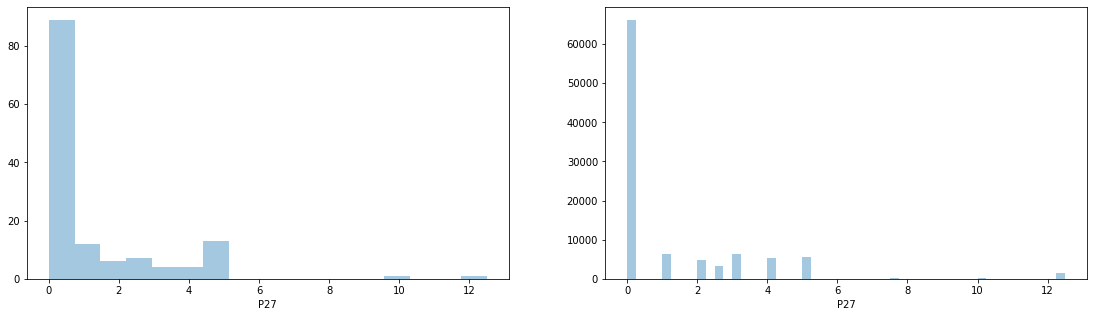

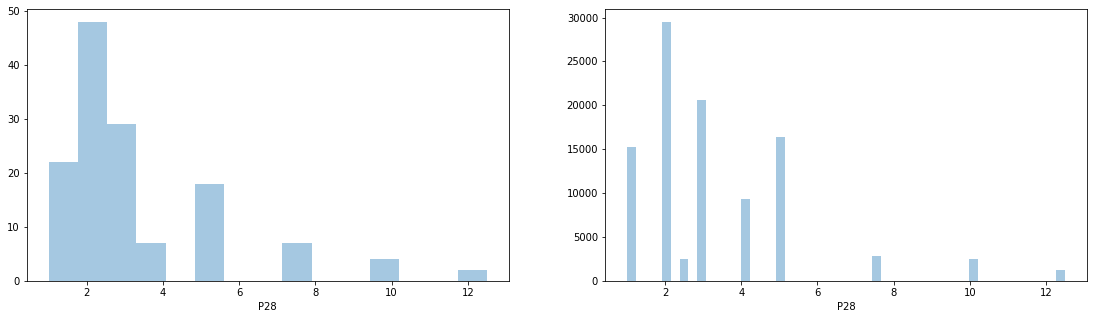

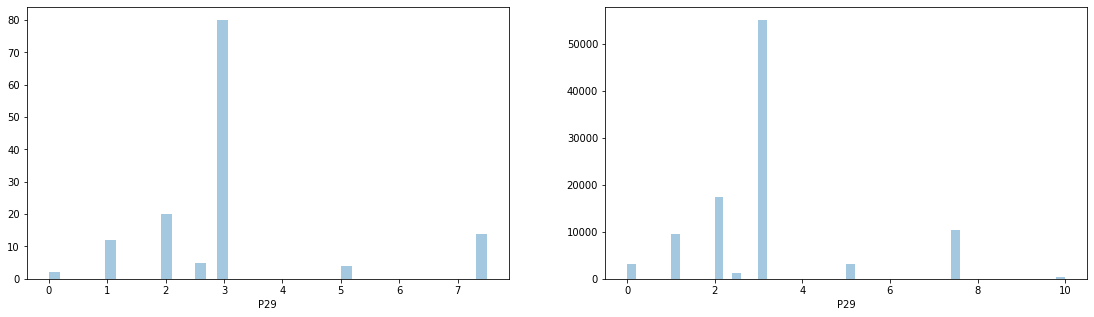

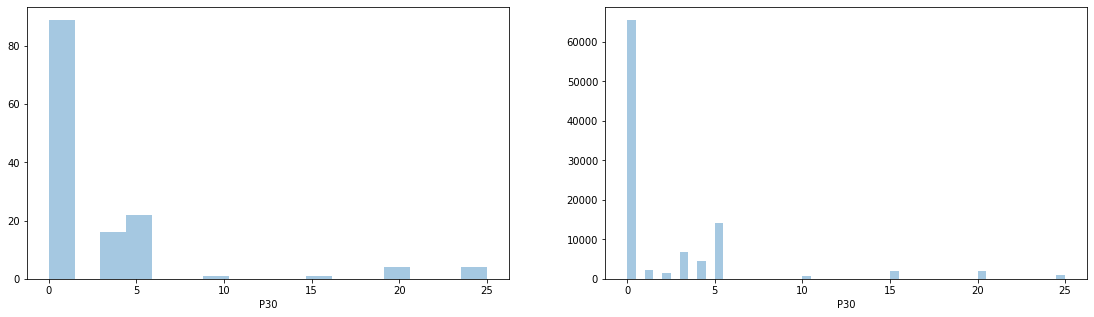

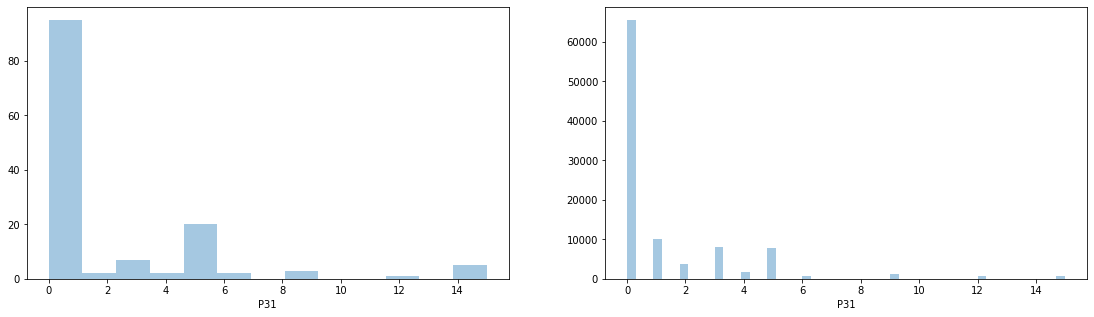

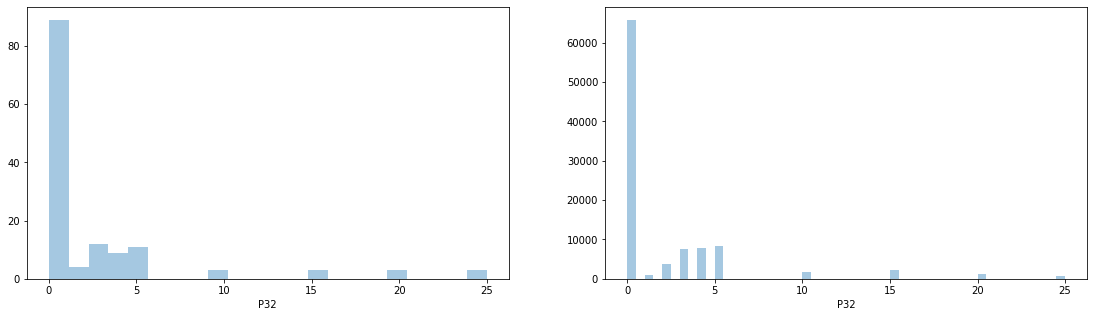

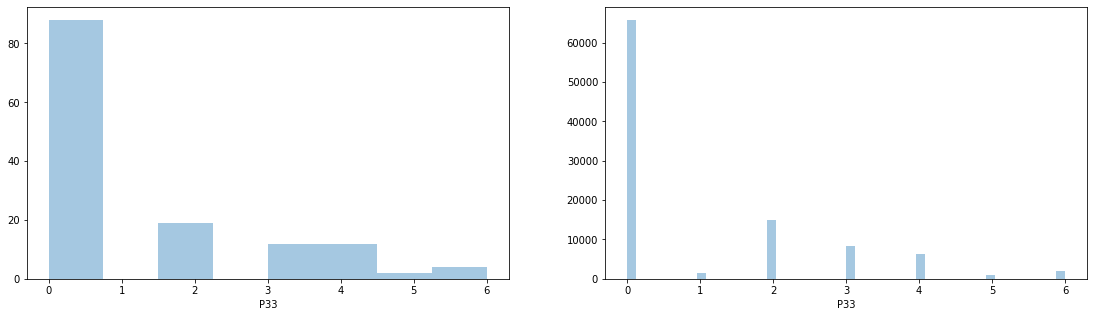

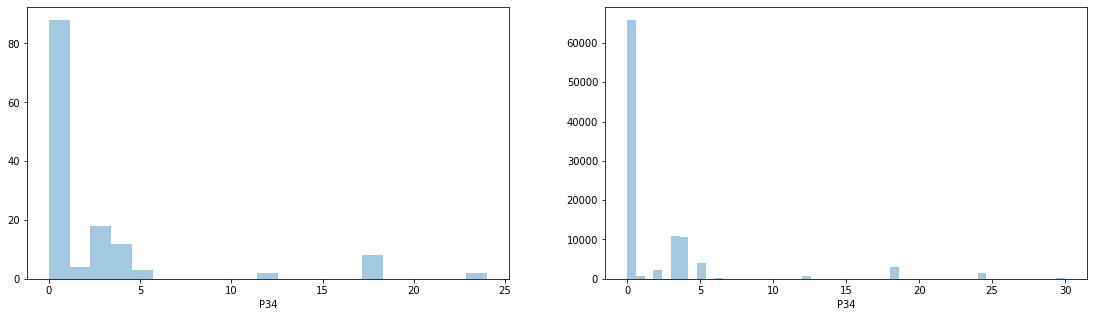

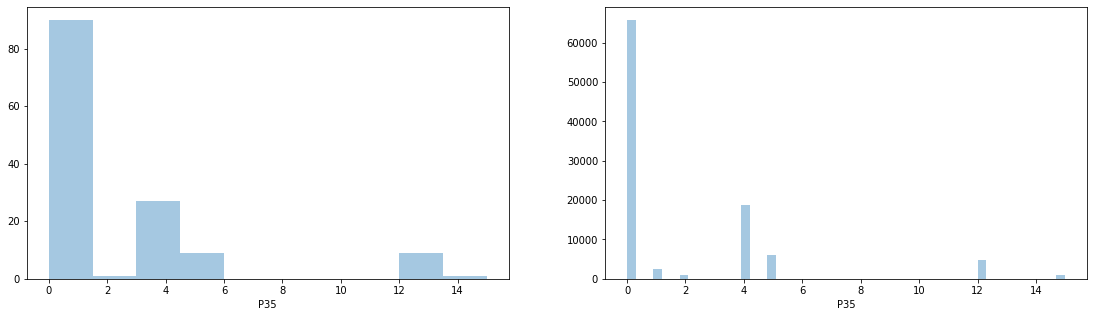

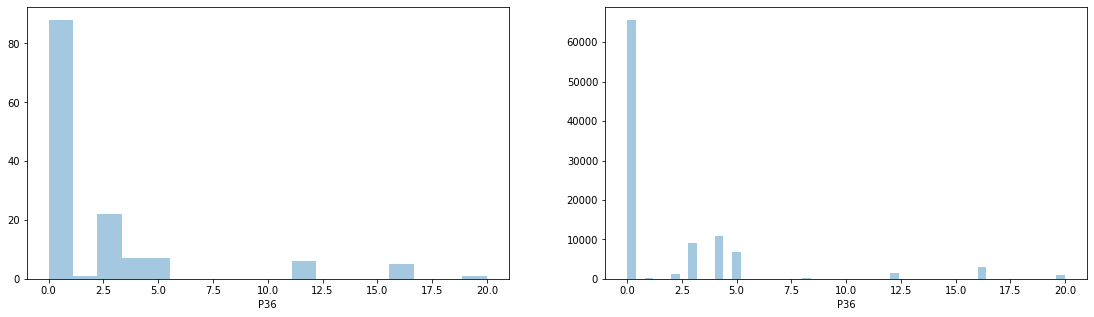

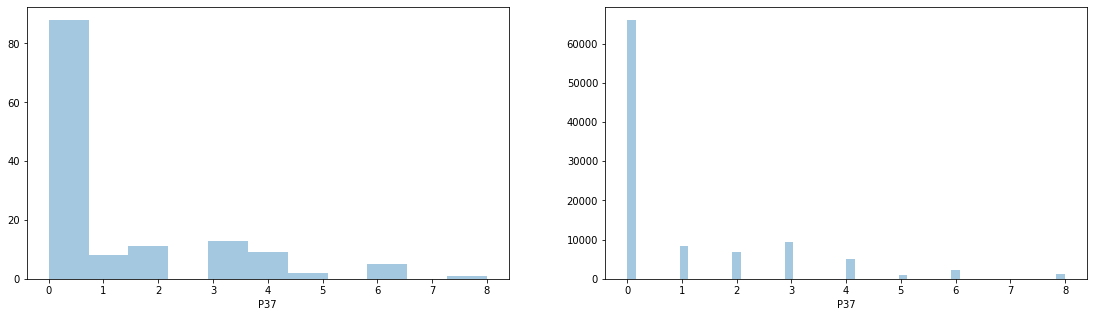

In [158]:
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    f1 = sns.distplot(df['P{}'.format(i)], ax=ax[0], kde=False);
    f2 = sns.distplot(test_df['P{}'.format(i)], ax=ax[1], kde=False);
    fig.show()

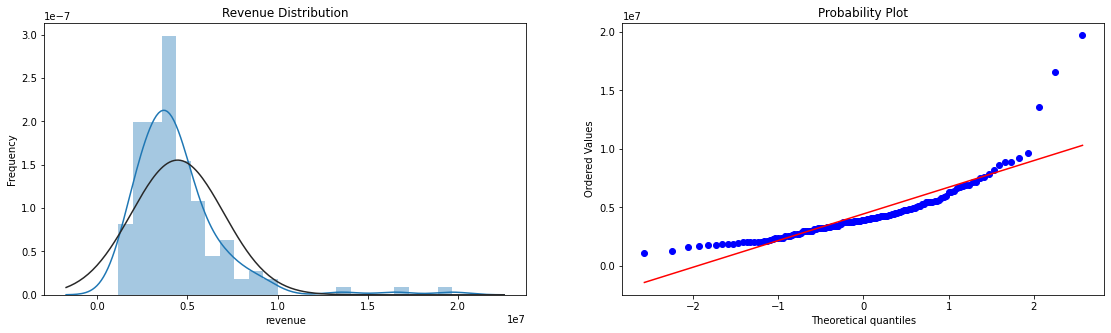

In [159]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(df['revenue'], fit=norm, ax=ax1)
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(df['revenue'], plot=plt)
f.show();

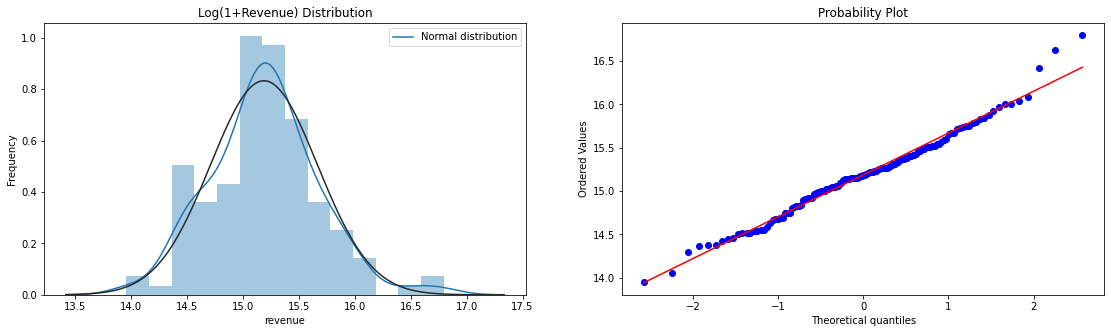

In [160]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(df['revenue']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+Revenue) Distribution')
ax2 = stats.probplot(np.log(df['revenue']), plot=plt)
f.show();

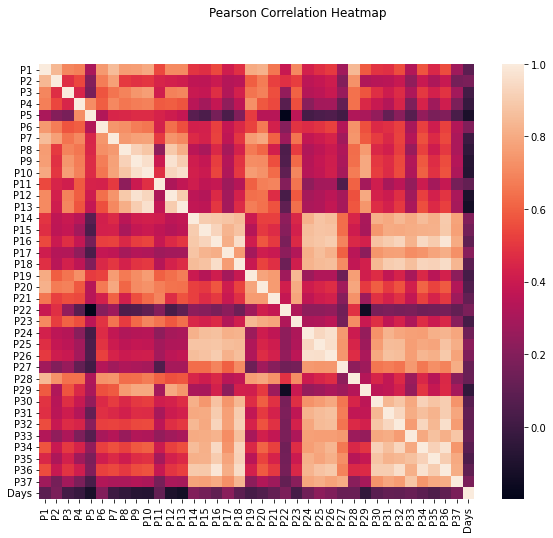

In [161]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['revenue','City Group','Type'], axis=1).corr(), square=True)
plt.suptitle('Pearson Correlation Heatmap')
plt.show();

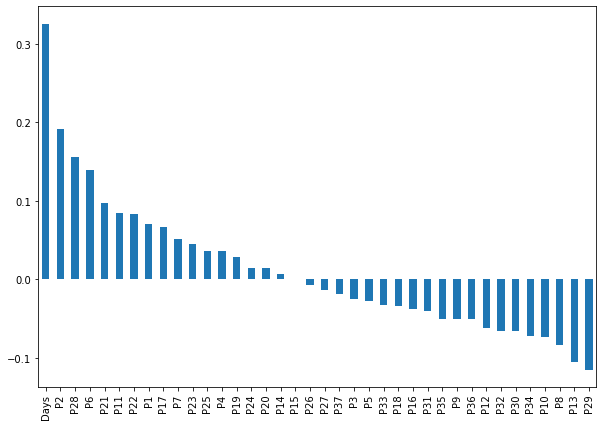

In [162]:
corr_with_revenue = df.drop(['City Group','Type'],axis=1).corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
corr_with_revenue.drop('revenue').plot.bar()
plt.show();

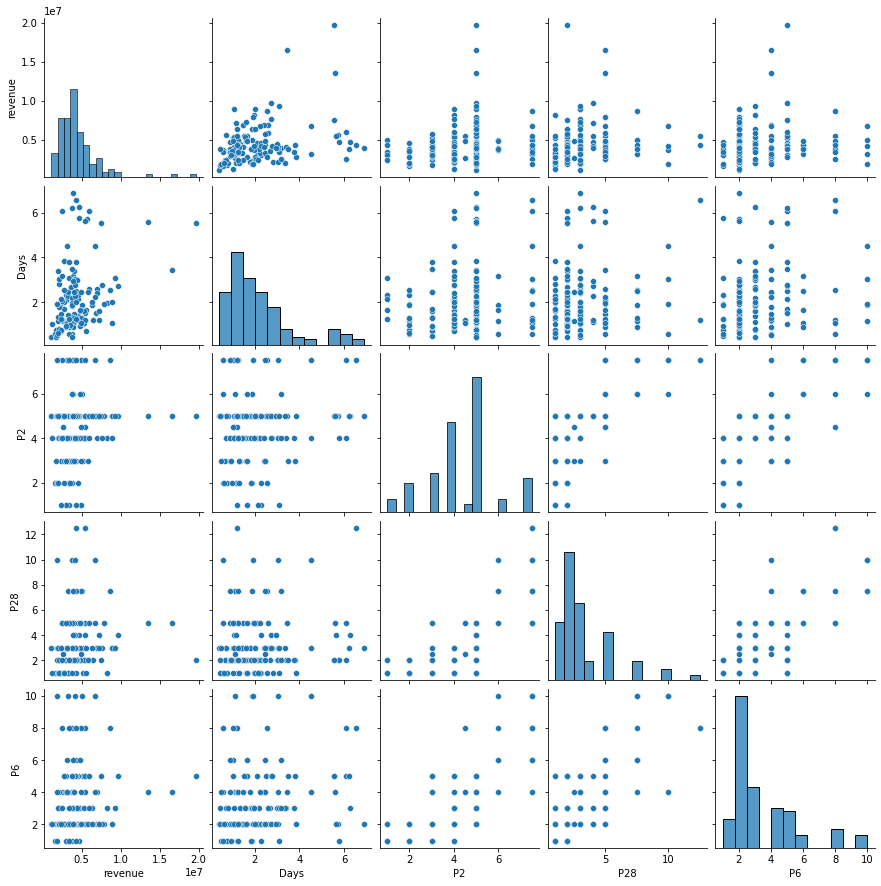

In [163]:
sns.pairplot(df[df.corr()['revenue'].apply(lambda x: abs(x)).sort_values(ascending=False).index[:5]])
plt.show();

In [164]:
copy_df = df.copy()
copy_test_df = test_df.copy()

In [200]:
df = copy_df.copy()
test_df = copy_test_df.copy()

numeric_features = df.dtypes[df.dtypes != "object"].index
skewed_features = df[numeric_features].apply(lambda x: skew(x))
skewed_features = skewed_features[skewed_features > 0.5].index
df[skewed_features] = np.log1p(df[skewed_features])
test_df[skewed_features.drop('revenue')] = np.log1p(df[skewed_features.drop('revenue')])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P1                     137 non-null    int64  
 1   P2                     137 non-null    float64
 2   P3                     137 non-null    float64
 3   P4                     137 non-null    float64
 4   P5                     137 non-null    int64  
 5   P6                     137 non-null    int64  
 6   P7                     137 non-null    int64  
 7   P8                     137 non-null    int64  
 8   P9                     137 non-null    int64  
 9   P10                    137 non-null    int64  
 10  P11                    137 non-null    int64  
 11  P12                    137 non-null    int64  
 12  P13                    137 non-null    float64
 13  P14                    137 non-null    int64  
 14  P15                    137 non-null    int64  
 15  P16   

In [201]:
df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,5,3,4,5,5,4,3,4,5653753.0,5.728
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,6923131.0,2.594
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2055379.0,0.744
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,...,25,12,10,6,18,12,12,6,2675511.0,1.145
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,...,5,1,3,2,3,4,3,3,4316715.0,2.144


In [202]:
columnsToEncode = df.select_dtypes(include=[object]).columns
df = pd.get_dummies(df, columns=columnsToEncode, drop_first=False)
test_df = pd.get_dummies(test_df, columns=columnsToEncode, drop_first=False)

In [203]:
X, y = df.drop('revenue', axis=1), df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

Lasso and Ridge

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [205]:
params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1, 5,
                                   10, 20],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_root_mean_squared_error')

In [206]:
ridge_regressor.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': True, 'solver': 'sparse_cg'}

In [207]:
ridge_regressor.best_score_

-1885083.3247479661

In [174]:
ridge_model = ridge_regressor.best_estimator_
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -2.2704289228922203
Test r2 score:  0.2143073088761257
Train RMSE: 0.3597
Test RMSE: 0.5181


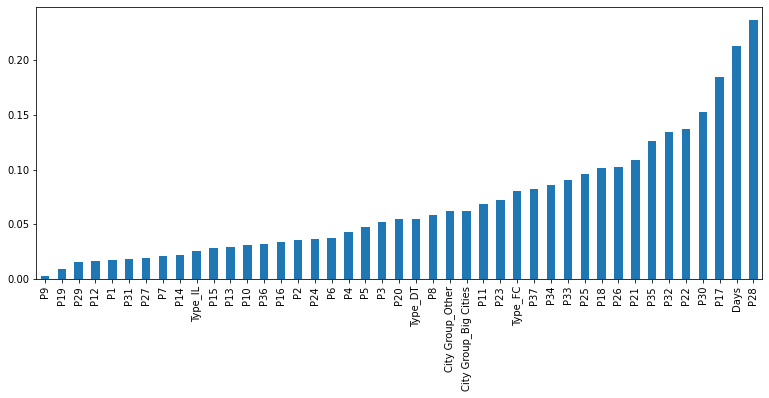

In [36]:
ridge_feature_coef = pd.Series(index = X_train.columns, data = np.abs(ridge_model.coef_))
ridge_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

In [37]:
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {lasso_regressor.best_params_["normalize"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 0.01
Optimal fit_intercept: True
Optimal normalize: False
Best score: -0.42698232744937403


In [46]:
lasso_model = lasso_regressor.best_estimator_
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -3.9376287544620334
Test r2 score:  0.21912966994032412
Train RMSE: 0.3857
Test RMSE: 0.5165


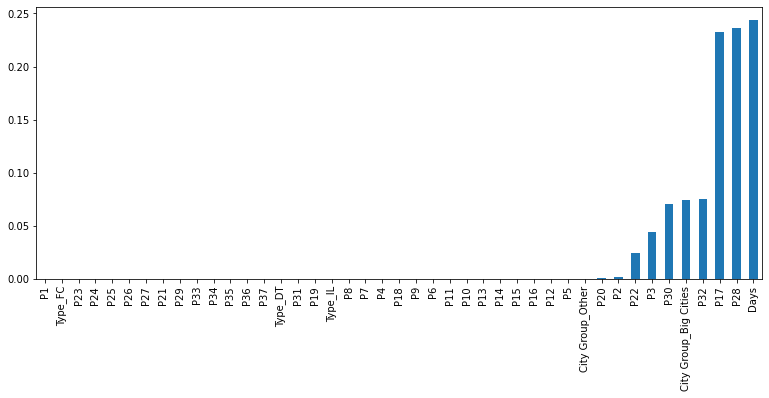

In [47]:
lasso_feature_coef = pd.Series(index = X_train.columns, data = np.abs(lasso_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

Elastic Net

In [48]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

el_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=5e-2, cv=10, n_jobs=-1)         
el_model.fit(X_train, y_train)
print(f'Optimal alpha: {el_model.alpha_:.6f}')
print(f'Optimal l1_ratio: {el_model.l1_ratio_:.3f}')

Optimal alpha: 0.013907
Optimal l1_ratio: 0.990


In [49]:
y_train_pred = el_model.predict(X_train)
y_pred = el_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -5.563407333783167
Test r2 score:  0.19735986739825928
Train RMSE: 0.3930
Test RMSE: 0.5236


9 features with reduction of 79.07%


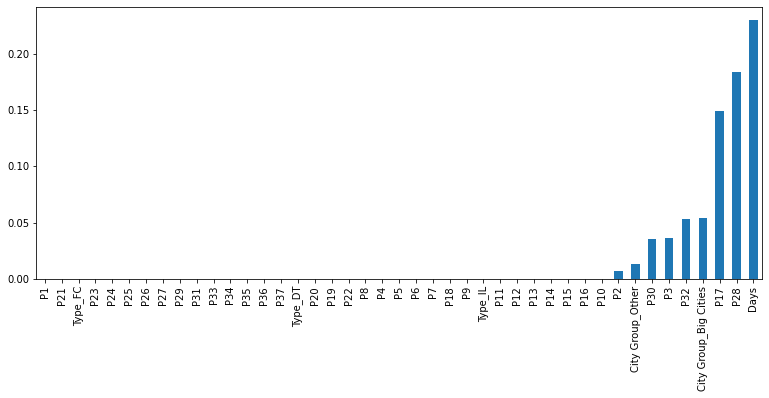

In [50]:
el_feature_coef = pd.Series(index = X_train.columns, data = np.abs(el_model.coef_))
n_features = (el_feature_coef>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(el_feature_coef))*100:2.2f}%')
el_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

KNN

In [51]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(X_train, y_train)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 11
Best score: -0.42408368940008756


In [52]:
knn_model = knn_regressor.best_estimator_
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -3.2078182531474617
Test r2 score:  0.1139343717949044
Train RMSE: 0.3895
Test RMSE: 0.5502


Random Forest

In [208]:
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 10
Optimal max_features: 0.3
Optimal min_sample_leaf: 3
Optimal min_samples_split: 12
Optimal n_estimators: 30
Best score: -1768275.5582272212


In [209]:
rf_model = rf_regressor.best_estimator_
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -1.668097122568582
Test r2 score:  0.1419351083514907
Train RMSE: 1462600.8397
Test RMSE: 3724831.3506


40 features with reduction of 6.98%


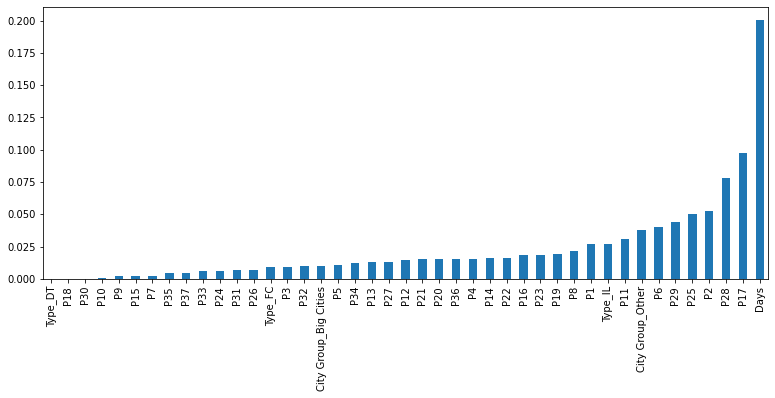

In [217]:
rf_feature_importance = pd.Series(index = X_train.columns, data = np.abs(rf_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

Light GBM

In [239]:
import lightgbm as lgbm

params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [10],
    'n_estimators': [10, 30, 50, 100]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
Optimal lr: 0.01
Optimal feature_fraction: 0.3
Optimal n_estimators: 100
Best score: -1838557.4460421265


In [240]:
lgb_model = lgb_regressor.best_estimator_
lgb_model.fit(X_train, y_train)
y_train_pred = lgb_model.predict(X_train)
y_pred = lgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -9.680344738526175
Test r2 score:  0.057484198321520075
Train RMSE: 1647785.4270
Test RMSE: 3903829.7337


24 features with reduction of 44.19%


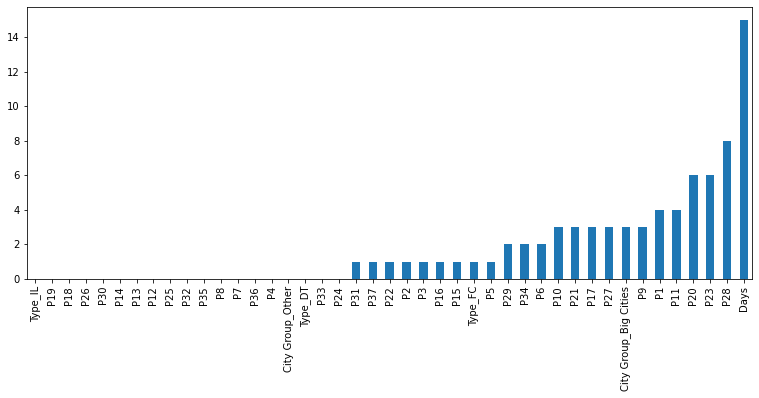

In [60]:
lgb_feature_importance = pd.Series(index = X_train.columns, data = np.abs(lgb_model.feature_importances_))
n_features = (lgb_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(lgb_feature_importance))*100:2.2f}%')
lgb_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

XGBoost

In [241]:
from xgboost import XGBRegressor

params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

Optimal lr: 0.1
Optimal colsample_bytree: 0.3
Optimal n_estimators: 30
Best score: -1795377.8266896303


In [242]:
xgb_model = xgb_regressor.best_estimator_
xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -0.6630887836321233
Test r2 score:  -0.011034203136801368
Train RMSE: 1263010.1032
Test RMSE: 4043239.5383


In [243]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=4,
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -0.6630887836321233
Test r2 score:  -0.011034203136801368
Train RMSE: 1263010.1032
Test RMSE: 4043239.5383


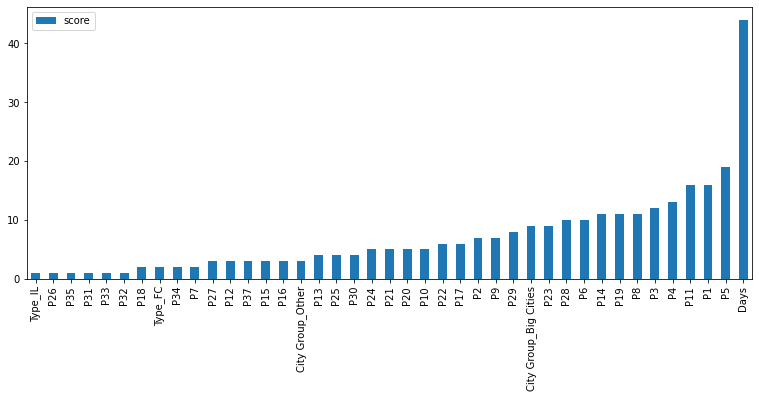

In [244]:
feature_important = xgb_model.get_booster().get_fscore()
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = 'score', ascending=True)
data.plot(kind='bar', figsize = (13,5))
plt.show()

Ensemble

In [231]:
rf_model_en = RandomForestRegressor(max_depth=50, max_features=0.4, min_samples_leaf=3, 
                                 min_samples_split=6, n_estimators=30, n_jobs=-1, oob_score=True)
rf_model_en.fit(X_train, y_train)
y_train_pred = rf_model_en.predict(X_train)
y_pred = rf_model_en.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -0.2411122825287939
Test r2 score:  0.19583056247229624
Train RMSE: 1190431.6936
Test RMSE: 3605955.2215


In [232]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
base_model = list()
base_model.append(('rf1', rf_model))
base_model.append(('rf2', rf_model_en))
base_model.append(('rf3', RandomForestRegressor(max_depth=8, max_features=0.1, min_samples_leaf=3, 
                                                min_samples_split=2, n_estimators=250, n_jobs=-1, oob_score=False)))
learner = LinearRegression()

stack2 = StackingRegressor(estimators=base_model, final_estimator=learner, cv=10)

stack2.fit(X, y)

StackingRegressor(cv=10,
                  estimators=[('rf1',
                               RandomForestRegressor(max_depth=10,
                                                     max_features=0.3,
                                                     min_samples_leaf=3,
                                                     min_samples_split=12,
                                                     n_estimators=30)),
                              ('rf2',
                               RandomForestRegressor(max_depth=50,
                                                     max_features=0.4,
                                                     min_samples_leaf=3,
                                                     min_samples_split=6,
                                                     n_estimators=30, n_jobs=-1,
                                                     oob_score=True)),
                              ('rf3',
                               RandomForestRegressor(max_depth=8,
                                                     max_features=0.1,
                                                     min_samples_leaf=3,
                                                     n_estimators=250,
                                                     n_jobs=-1))],
                  final_estimator=LinearRegression())

In [236]:
subm = pd.read_csv('sampleSubmission.csv', index_col='Id')

In [237]:
pred = .predict(test_df.drop('Id', axis=1))
subm['Prediction'] = pred
subm.to_csv('stack_res.csv')

In [238]:
pred2 = rf_model.predict(test_df.drop('Id', axis=1))
subm['Prediction'] = pred2
subm.to_csv('rf_res.csv')